## RFM - сегментация клиентов 

Скачайте датасет и проведите RFM анализ. В каждом подсегменте поделите пользователей на 4 класса.

Описание данных:
 - InvoiceNo - номер заказа 
 - CustomerCode - уникальный код пользователя 
 - InvoiceDate - дата заказа 
 - Amount - сумма заказа 

Задания 

1. Какое максимальное кол-во покупок было совершено одним пользователем?
2. Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М?
3. Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?
4. Какое максимальное количество дней может пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в      подсегменте R?
5. Сколько пользователей попало в сегмент 111?
6. Сколько пользователей попало в сегмент 311?
7. В каком RFM-сегменте самое большое кол-во пользователей?
8. В каком RFM-сегменте самое маленькое кол-во пользователей?
9. Какое количество пользователей попало в самый малочисленный сегмент?

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [94]:
df = pd.read_csv('C:/Users/рома/Downloads/RFM_ht_data.csv', parse_dates=['InvoiceDate'])
df.head()

C:\soft\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332730 entries, 0 to 332729
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     332730 non-null  object        
 1   CustomerCode  332730 non-null  object        
 2   InvoiceDate   332730 non-null  datetime64[ns]
 3   Amount        332730 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.2+ MB


In [96]:
df.CustomerCode = df.CustomerCode.astype('string') # меняем формат кода пользователя на string

In [97]:
df.isna().sum() # смотрим пропущенные значения 

InvoiceNo       0
CustomerCode    0
InvoiceDate     0
Amount          0
dtype: int64

In [98]:
df['InvoiceDate'].describe() 

<ipython-input-98-c7b848523f1d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['InvoiceDate'].describe()


count                  332730
unique                     30
top       2020-09-30 00:00:00
freq                    19781
first     2020-09-01 00:00:00
last      2020-09-30 00:00:00
Name: InvoiceDate, dtype: object

<AxesSubplot:xlabel='Amount', ylabel='Count'>

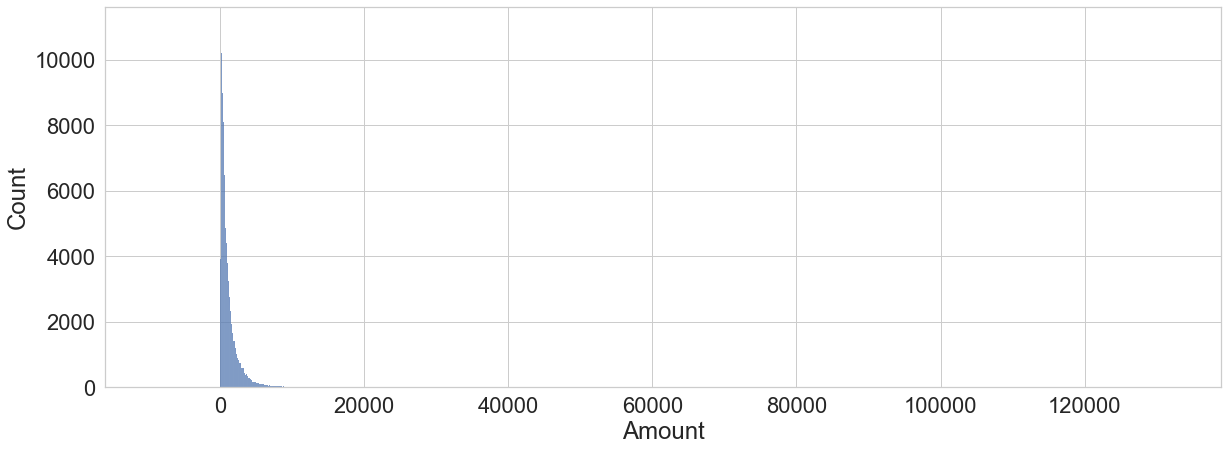

In [99]:
sns.histplot(df.Amount) # распределение суммы покупок 

In [100]:
df.Amount.quantile([0.25,0.5,0.75])

0.25     350.0000
0.50     720.4450
0.75    1491.5075
Name: Amount, dtype: float64

In [101]:
df.head()

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [102]:
last_date = df.InvoiceDate.max() # дата последнего заказа в наших данных
last_date

Timestamp('2020-09-30 00:00:00')

In [103]:
RFM_table = df.groupby('CustomerCode')\
              .agg({'InvoiceDate':lambda x: (last_date-x.max()).days, # Recency #Количество дней с последнего заказа
                    'InvoiceNo':lambda x: len(x), # Frequency #Количество заказов
                    'Amount':lambda x: sum(x) # Monetary Value #Общая сумма по всем заказам
                   })
RFM_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Amount': 'monetary_value'}, inplace=True)

In [104]:
RFM_table

,recency,frequency,monetary_value
CustomerCode,,,
02213019,19,1,1609.20
02213042,22,3,9685.48
02213071,29,1,415.00
02213088,23,1,305.00
02213092,25,1,1412.88
...,...,...,...
99099927,10,1,961.10
99099936,0,1,1521.78
99099959,8,2,1444.56


In [105]:
quantiles = RFM_table.quantile([0.25,0.5,0.75]) # таблица квантилей 
quantiles

,recency,frequency,monetary_value
0.25,2.0,1.0,765.00
0.50,8.0,2.0,1834.48
0.75,16.0,3.0,4008.84


In [106]:
RFM_segmentation = RFM_table

In [107]:
# функции для определиня rfm score
def R_class_score(value,parameter_name, quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4
    
def FM_class_score(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 4
    elif value <= quantiles_table[parameter_name][0.50]:
        return 3
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1


In [108]:
# создаем новые столбцы в которых будет присвоен скор каждому покупателю 
RFM_segmentation['R_Score'] = RFM_segmentation['recency'].apply(R_class_score, args=('recency',quantiles))

RFM_segmentation['F_Score'] = RFM_segmentation['frequency'].apply(FM_class_score, args=('frequency',quantiles))

RFM_segmentation['M_Score'] = RFM_segmentation['monetary_value'].apply(FM_class_score, args=('monetary_value',quantiles))

RFM_segmentation['RFMClass'] = RFM_segmentation.R_Score.map(str)+RFM_segmentation.F_Score.map(str)+RFM_segmentation.M_Score.map(str)

In [109]:
RFM_segmentation

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFMClass
CustomerCode,,,,,,,
02213019,19,1,1609.20,4,4,3,443
02213042,22,3,9685.48,4,2,1,421
02213071,29,1,415.00,4,4,4,444
02213088,23,1,305.00,4,4,4,444
02213092,25,1,1412.88,4,4,3,443
...,...,...,...,...,...,...,...
99099927,10,1,961.10,3,4,3,343
99099936,0,1,1521.78,1,4,3,143
99099959,8,2,1444.56,2,3,3,233


In [110]:
pd.crosstab(index = RFM_segmentation.R_Score, columns = RFM_segmentation.F_Score)

F_Score,1,2,3,4
R_Score,,,,
1,14433,4671,5795,6074
2,9634,5889,8633,10399
3,3091,3748,7734,13263
4,542,1311,5415,23101


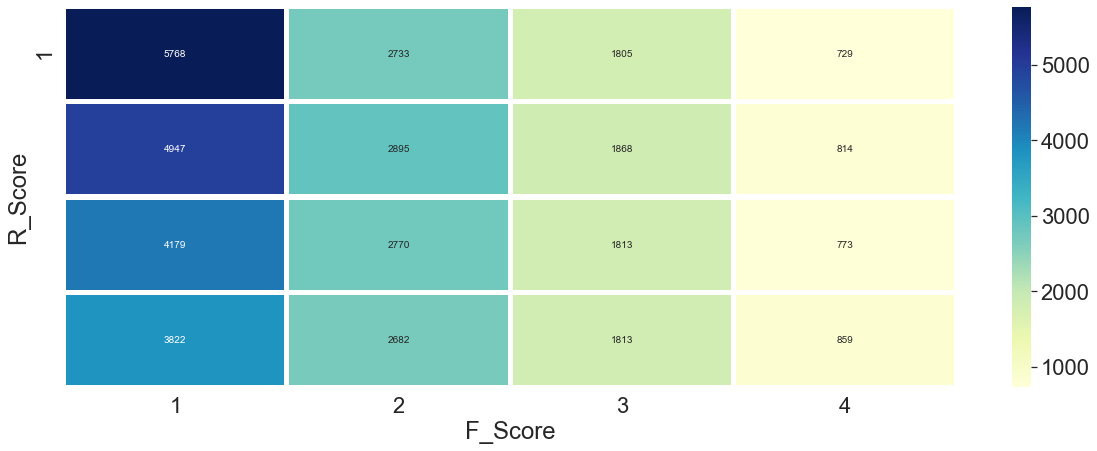

In [111]:
# посмотрим на медианные значения сумм покупок в разных сегмантах 
rfm_table = RFM_segmentation.pivot_table(
                        index='R_Score', 
                        columns='F_Score', 
                        values='monetary_value', 
                        aggfunc=np.median).applymap(int)

sns.heatmap(rfm_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);

____

## Task 1
Какое максимальное кол-во покупок было совершено одним пользователем?

In [112]:
df.head()

,InvoiceNo,CustomerCode,InvoiceDate,Amount
0,C0011810010001,19067290,2020-09-01,1716.00
1,C0011810010017,13233933,2020-09-01,1489.74
2,C0011810010020,99057968,2020-09-01,151.47
3,C0011810010021,80007276,2020-09-01,146.72
4,C0011810010024,13164076,2020-09-01,104.00


In [113]:
df.groupby('CustomerCode').InvoiceNo.nunique().sort_values(ascending=False).head(1)

CustomerCode
19057820    204
Name: InvoiceNo, dtype: int64

Максимальное кол-во покупок совершенное одним пользователем - 204

## Task 2
Какая верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М?

In [114]:
RFM_segmentation.query('M_Score == 4').monetary_value.max()

765.0

Верхняя граница у суммы покупок у пользователей с классом 4 в подсегменте М - 765

## Task 3
Какая нижняя граница у количества покупок у пользователей с классом 1 в подсегменте F?

In [115]:
RFM_segmentation.query('F_Score == 1').frequency.min()

4

## Task 4
Какое максимальное количество дней может пройти с момента последней покупки для того, чтобы пользователь попал в класс 2 в      подсегменте R?

In [117]:
RFM_segmentation.query('R_Score==2').recency.max()

8

8 дней может пройти для того чтобы пользователь попал в класс 2.

## Task 5
Сколько пользователей попало в сегмент 111?

In [120]:
RFM_segmentation.query('RFMClass=="111"').shape[0]

9705

## Task 6
Сколько пользователей попало в сегмент 311?

In [121]:
RFM_segmentation.query('RFMClass=="311"').shape[0]

1609

## Task 7
В каком RFM-сегменте самое большое кол-во пользователей?



In [123]:
RFM_segmentation.RFMClass.value_counts().idxmax()

'444'

## Task 8
В каком RFM-сегменте самое маленькое кол-во пользователей?

In [124]:
RFM_segmentation.RFMClass.value_counts().idxmin()

'414'

## Task 9
Какое количество пользователей попало в самый малочисленный сегмент?

In [125]:
RFM_segmentation.query('RFMClass == "414"').shape[0]

2